## Assignment : 14

<pre>
1. Download the preprocessed DonorsChoose data from here <a href='https://drive.google.com/file/d/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO/view?usp=sharing'>Dataset</a>
2. Split the data into train, cv, and test
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric. you need to print the AUC value for each epoch. Note: you should NOT use the tf.metric.auc
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. You should Save the best model weights.
8. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
9. Use Categorical Cross Entropy as Loss to minimize.
10. try to get AUC more than 0.8 for atleast one model
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [1]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(1,))
embedding = Embedding(5, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

NameError: name 'Input' is not defined

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data feature 'essay' <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [1]:
import pandas as pd
dnr_chdf=pd.read_csv("preprocessed_data.csv")

In [2]:
dnr_chdf['project_is_approved']

0         1
1         1
2         1
3         1
4         1
         ..
109243    1
109244    1
109245    1
109246    1
109247    1
Name: project_is_approved, Length: 109248, dtype: int64

# Spliting the data into train, cv, and test

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dnr_chdf.drop(columns=['project_is_approved']), dnr_chdf['project_is_approved'], test_size=0.2, random_state=42,stratify=dnr_chdf['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)


# converting Y_value to one hot coding vectors for categorical cross entropy


In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = OneHotEncoder()
y_train_ohe = encoder.fit_transform(np.array(y_train).reshape(-1,1))
y_test_ohe = encoder.transform(np.array(y_test).reshape(-1,1))
y_cv_ohe = encoder.transform(np.array(y_cv).reshape(-1,1))
y_train_ohe = y_train_ohe.toarray()
y_test_ohe = y_test_ohe.toarray()
y_cv_ohe=y_cv_ohe.toarray()

In [5]:
X_train.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [6]:
#https://datascience.stackexchange.com/questions/13746/how-to-define-a-custom-performance-metric-in-keras/20192#20192

In [7]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
!pip install tensorboardcolab


You should consider upgrading via the 'c:\users\thrib\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

##importing all required modules
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

#importing layers from tensorflow
from tensorflow.keras.layers import Dense,concatenate,Activation,Dropout,Input,Conv1D
from tensorflow.keras.models import Model
from keras.layers import Embedding
from keras.layers import Flatten
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers



In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [10]:
X_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
16528,tx,ms,grades_prek_2,0,appliedlearning,earlydevelopment,my pre kindergarten students risk students mos...,1834.66
99416,ca,mr,grades_6_8,14,math_science music_arts,mathematics visualarts,my middle school students little no access cre...,838.88
47276,ut,mrs,grades_prek_2,5,literacy_language,literacy literature_writing,the students class love read using technology ...,243.08
75882,pa,mr,grades_9_12,9,music_arts,visualarts,most students live poverty level they talented...,75.54
41540,tx,mrs,grades_3_5,0,literacy_language,literacy literature_writing,in class i diverse group students different ba...,472.73


In [11]:
len(X_train['school_state'].unique())

51

In [12]:
len(X_train['school_state'].unique())

51

In [13]:
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', auroc])


In [14]:
tf.keras.backend.clear_session()


In [15]:
import pickle
glove_vector = open("glove_vectors","rb")
glove_words = pickle.load(glove_vector)

#tokenzing the essay_text

In [501]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['essay'])
essy_train=tokenizer.texts_to_sequences(X_train['essay'])
essy_cv=tokenizer.texts_to_sequences(X_cv['essay'])
essy_test=tokenizer.texts_to_sequences(X_test['essay'])

vocab_size=len(tokenizer.word_index.items())+1

emb_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        emb_matrix[i] = embedding_vector

In [267]:
emb_matrix.shape

(47380, 300)

In [268]:
len(tokenizer.word_index.items())+1

47380

In [269]:
print(len(essy_train[1]),len(X_train['essay'][1]))

238 1138


In [270]:
z=[]
for i in (essy_train):
    z.append(len(i))
    

118


151.25458394118826

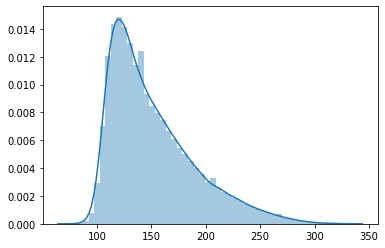

In [271]:
import seaborn as sns
sns.distplot(z,kde=True,hist=True)
import statistics 
print(statistics.mode(z))
np.mean(np.array(z))

In [272]:
np.percentile(z,99.8)

293.0

In [273]:
len(essy_train[1])

238

In [299]:
max_length=293
pd_essy_train = pad_sequences(essy_train, maxlen=max_length)
pd_essy_cv=pad_sequences(essy_cv, maxlen=max_length)
pd_essy_test=pad_sequences(essy_test, maxlen=max_length)
from keras.layers import LSTM
input_txt = Input(shape=(293,),name="essay_txt")
embd_layer=Embedding(vocab_size, 300, weights=[emb_matrix],input_length=293 ,trainable=False)(input_txt)
txt_LSTM=LSTM(100,return_sequences=True)(embd_layer)
txt_emb=Flatten()(txt_LSTM)

In [275]:
type(txt_emb)

tensorflow.python.framework.ops.Tensor

In [276]:
51//2

25

In [300]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
school_state_letrain=le1.fit_transform(X_train['school_state'])
#since it is label encoding the input dimension is 1 so we are using 1 as i/p dim
no_of_unique_cat1=len(le1.classes_)
size9 = min(no_of_unique_cat1//2,50)
input_schoolst = Input(shape=(1,),name="school_state")
embedschoolst= Embedding(input_dim=no_of_unique_cat1+1, output_dim=size9, input_length=1)(input_schoolst)
scstat_flatten = Flatten()(embedschoolst) 
school_state_lecv=le1.transform(X_cv['school_state'])
school_state_letest=le1.transform(X_test['school_state'])

#output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",na5me='emb_output')(embedding)#we are giving output of second layer
#flatten = tf.keras.layers.Flatten()
from sklearn import preprocessing
le3 = preprocessing.LabelEncoder()
project_grade_letrain=le3.fit_transform(X_train['project_grade_category'])
no_of_unique_cat2=len(le3.classes_)
size8 = min(no_of_unique_cat2//2,50)
input_grade_category = Input(shape=(1,),name="project_grade_category")
embedgrade_cat = Embedding(input_dim=no_of_unique_cat2+1, output_dim=size8, input_length=1)(input_grade_category)
projgrade_flatten = Flatten()(embedgrade_cat) 
project_grade_lecv=le3.transform(X_cv['project_grade_category'])
project_grade_letest=le3.transform(X_test['project_grade_category'])

from sklearn import preprocessing
le4 = preprocessing.LabelEncoder()
clean_categ_letrain=le4.fit_transform(X_train['clean_categories'])
no_of_unique_cat3=len(le4.classes_)
size6 = min(no_of_unique_cat3//2,50)
input_clean_categories = Input(shape=(1,),name="clean_categories")
clean_categembed = Embedding(input_dim=no_of_unique_cat3+1, output_dim=size6, input_length=1)(input_clean_categories)
clean_categ_flatten = Flatten()(clean_categembed) 

clean_categ_lecv=le4.transform(X_cv['clean_categories'])
clean_categ_letest=le4.transform(X_test['clean_categories'])


from sklearn import preprocessing
le5 = preprocessing.LabelEncoder()
clean_subcateg_letrain=le5.fit_transform(X_train['clean_subcategories'])
le5.classes_=np.append(le5.classes_,' ')
no_of_unique_cat4=len(le5.classes_)
size4 = min(no_of_unique_cat4//2,50)
input_clean_subcategories = Input(shape=(1,),name="clean_subcategories")
embesubcat = Embedding(input_dim=no_of_unique_cat4+1, output_dim=size4, input_length=1)(input_clean_subcategories)
clean_subcateg_flatten = Flatten()(embesubcat) 

X_cv['clean_subcategories']=X_cv['clean_subcategories'].map(lambda s: ' ' if s not in le5.classes_ else s)
X_test['clean_subcategories']=X_test['clean_subcategories'].map(lambda s: ' ' if s not in le5.classes_ else s)
#clean_subcateg_letrain=le5.fit_transform(X_train['clean_subcategories'])
clean_subcateg_lecv=le5.transform(X_cv['clean_subcategories'])
clean_subcateg_letest=le5.transform(X_test['clean_subcategories'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
teacher_prefix_letrain=le.fit_transform(X_train['teacher_prefix'])
no_of_unique_cat6=len(le.classes_)
size5 = min(no_of_unique_cat6//2,50)
input_teprefix = Input(shape=(1,),name="teacher_prefix")
prefixembed = Embedding(input_dim=no_of_unique_cat6+1, output_dim=size5, input_length=1)(input_teprefix)
teacher_prefix_flatten = Flatten()(prefixembed) 
teacher_prefix_lecv=le.transform(X_cv['teacher_prefix'])
teacher_prefix_letest=le.transform(X_test['teacher_prefix'])

In [ ]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
trainprev_posted_proj = scale.fit_transform(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1,1))
cvprev_posted_proj = scale.transform(np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1,1))
testprev_posted_proj = scale.transform(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1,1))
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
train_price = scale.fit_transform(np.array(X_train['price']).reshape(-1,1))
cv_price = scale.transform(np.array(X_cv['price']).reshape(-1,1))
test_price = scale.transform(np.array(X_test['price']).reshape(-1,1))


In [ ]:
input_numerical_features = Input(shape=(2,),name="numerical_features")
numerical_dense = Dense(5,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.01),name="numerical")(input_numerical_features)


In [307]:
len(le5.classes_)

393

In [307]:
len(le5.classes_)

393

In [309]:
trnumerical_features.shape

(69918, 2)

In [307]:
len(le5.classes_)

393

In [307]:
len(le5.classes_)

393

In [310]:
concat_layer = concatenate(inputs=[txt_emb,scstat_flatten,projgrade_flatten,clean_categ_flatten,clean_subcateg_flatten,teacher_prefix_flatten,numerical_dense],name="concat")
layer1 = Dense(units=150,activation='relu',kernel_initializer='he_normal',name="layer1",kernel_regularizer=regularizers.l2(0.001))(concat_layer)
d1=Dropout(.5)(layer1)
layer4 = Dense(units=75,activation='relu',kernel_initializer='he_normal',name="layer4",kernel_regularizer=regularizers.l2(0.001))(d1)
d2=Dropout(.5)(layer4)
layer6 = Dense(units=36,activation='relu',kernel_initializer='he_normal',name="layer6",kernel_regularizer=regularizers.l2(0.001))(d2)
output = Dense(2, activation='softmax', name='output')(layer6)
model1=Model(inputs=[input_txt,input_schoolst,input_grade_category,input_clean_categories,input_clean_subcategories,input_teprefix,input_numerical_features],outputs=[output])

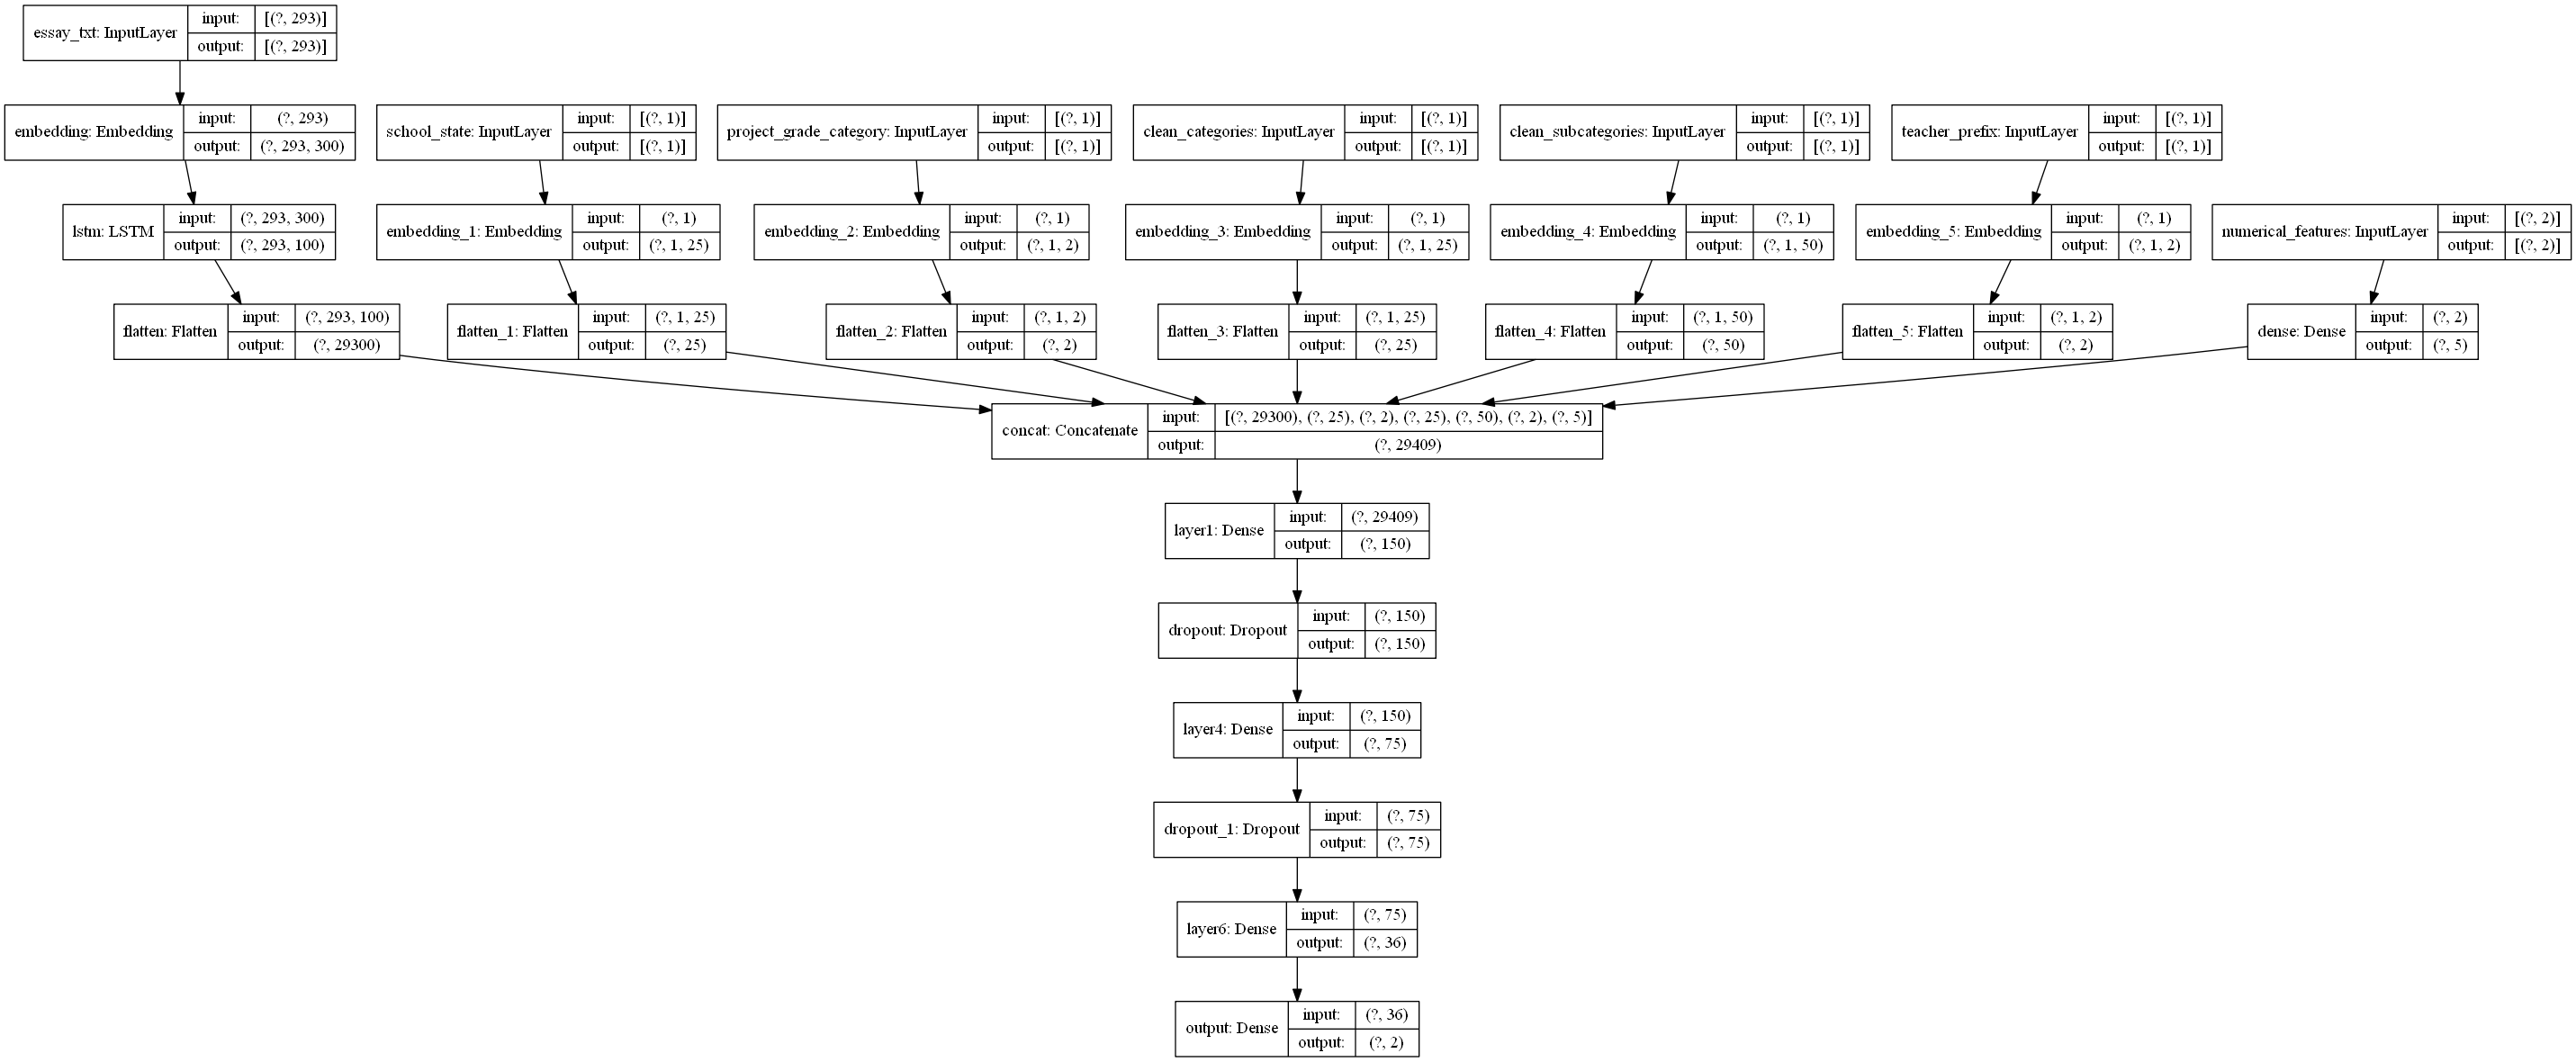

In [311]:
tf.keras.utils.plot_model(
    model1,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [502]:
tf.keras.backend.clear_session()


In [312]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy', auroc])

In [313]:
trainable_x=[pd_essy_train,school_state_letrain,project_grade_letrain,clean_categ_letrain,clean_subcateg_letrain,teacher_prefix_letrain,trnumerical_features]

cv_x=[pd_essy_cv,school_state_lecv,project_grade_lecv,clean_categ_lecv,clean_subcateg_lecv,teacher_prefix_lecv,cvnumerical_features]

test_x=[pd_essy_test,school_state_letest,project_grade_letest,clean_categ_letest,clean_subcateg_letest,teacher_prefix_letest,testnumerical_features]

In [314]:
print(pd_essy_train.shape,school_state_letrain.shape,project_grade_letrain.shape,clean_categ_letrain.shape,clean_subcateg_letrain.shape,teacher_prefix_letrain.shape,trnumerical_features.shape)

(69918, 293) (69918,) (69918,) (69918,) (69918,) (69918,) (69918, 2)


In [63]:
import os
checkpoint_path = "training_model1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,save_weights_only=True,verbose=1)



In [84]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback1 = TensorBoard(logdir, histogram_freq=1)

In [85]:
import tensorflow as tf
import datetime, os

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

Reusing TensorBoard on port 6006 (pid 15200), started 1 day, 17:41:06 ago. (Use '!kill 15200' to kill it.)

In [319]:
history1 = model1.fit(trainable_x,y_train_ohe,batch_size=100,epochs=5,validation_data=(cv_x,y_cv_ohe),verbose=1,callbacks = [tensorboard_callback1,cp_callback ])


Epoch 1/5
700/700 [==============================] - ETA: 0s - loss: 0.6058 - accuracy: 0.8461 - auroc: 0.6845
Epoch 00001: val_loss improved from inf to 0.48088, saving model to training_model1/cp.ckpt
700/700 [==============================] - 146s 209ms/step - loss: 0.6058 - accuracy: 0.8461 - auroc: 0.6845 - val_loss: 0.4809 - val_accuracy: 0.8511 - val_auroc: 0.7400
Epoch 2/5
700/700 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8517 - auroc: 0.7477
Epoch 00002: val_loss improved from 0.48088 to 0.43264, saving model to training_model1/cp.ckpt
700/700 [==============================] - 146s 209ms/step - loss: 0.4545 - accuracy: 0.8517 - auroc: 0.7477 - val_loss: 0.4326 - val_accuracy: 0.8561 - val_auroc: 0.7542
Epoch 3/5
700/700 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.8527 - auroc: 0.7619
Epoch 00003: val_loss improved from 0.43264 to 0.42698, saving model to training_model1/cp.ckpt
700/700 [==============================] 

In [47]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# EPOCH_AU_ROC T_Board

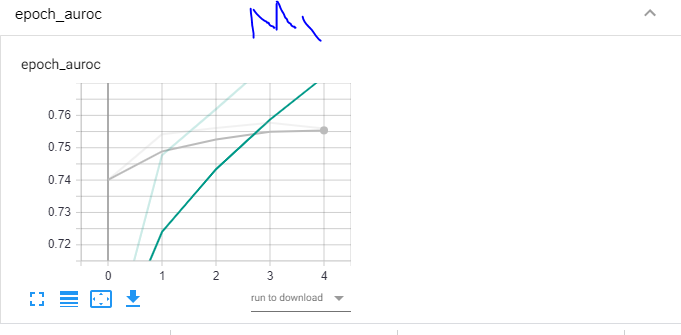

In [4]:
from IPython.display import Image
Image("C:/Users/thrib/Pictures/Camera Roll/m1_epoch_aucroc.PNG")


# EPOCH_LOSS T_Board

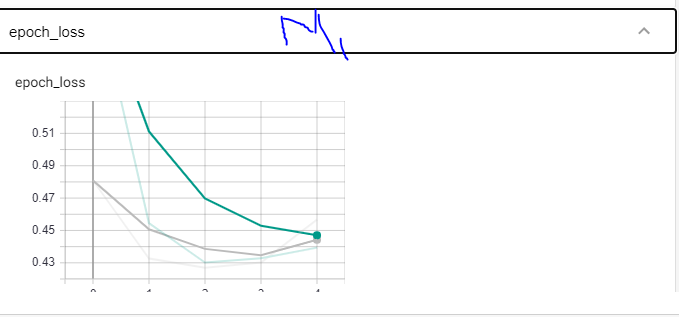

In [5]:
from IPython.display import Image
Image("C:/Users/thrib/Pictures/Camera Roll/m1-epochloss.PNG")


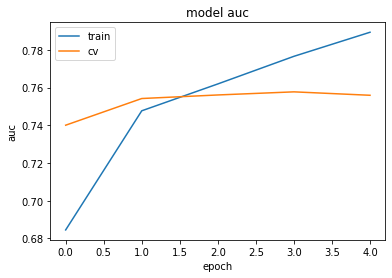

In [320]:
import matplotlib.pyplot as plt
plt.plot(history1.history['auroc'])
plt.plot(history1.history['val_auroc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'cv'])
plt.show()

In [85]:
import os
import datetime

! rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

%load_ext tensorboard
%tensorboard --logdir $logdir

logs\20200723-155855


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [91]:
tf.saved_model.save(model1, '/saved_model1/')

INFO:tensorflow:Assets written to: /saved_model1/assets


In [321]:
checkpoint_path = "training_model1/cp.ckpt"
model_ckpt1 = model1
model_ckpt1.load_weights(checkpoint_path)

In [322]:
hist_test=model_ckpt1.evaluate(test_x,y_test_ohe,batch_size=100)

219/219 [==============================] - 18s 83ms/step - loss: 0.4244 - accuracy: 0.8572 - auroc: 0.7639


In [323]:
hist_test

[0.4244065582752228, 0.8571624755859375, 0.7639353275299072]

# MODEL-2

In [101]:
tf.keras.backend.clear_session()


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit_transform(X_train['essay'])

<69918x13940 sparse matrix of type '<class 'numpy.float64'>'
	with 7471244 stored elements in Compressed Sparse Row format>

In [28]:
idf=vectorizer.idf_
di=dict(zip(vectorizer.get_feature_names(),idf))


In [17]:
np.percentile(vectorizer.idf_,8)

5.091188746695575

In [18]:
vectorizer.idf_

array([7.19224808, 5.86909461, 4.50254702, ..., 9.59014335, 9.26472095,
       8.78779688])

In [19]:
pd.Series(vectorizer.idf_).describe()

count    13940.000000
mean         7.798553
std          1.647733
min          1.007566
25%          6.861788
50%          8.203849
75%          9.110570
max          9.757197
dtype: float64

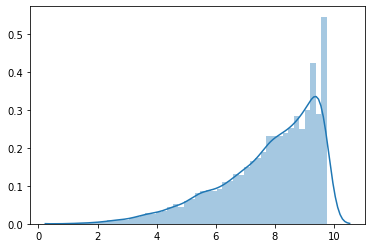

In [23]:
import seaborn as sns
sns.distplot(vectorizer.idf_)

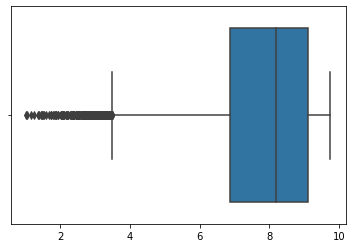

In [24]:
sns.boxplot(x=vectorizer.idf_)

In [25]:
q1=np.percentile(vectorizer.idf_,20)

q2=np.percentile(vectorizer.idf_,95)
print(q1,q2)

6.461360569364945 9.670186058379645


# I am taking the 5 and 11.4 as threshold as those are the moderatley repeated words

In [26]:
from tqdm.notebook import tqdm

In [33]:
usf_corpus=[]
for key,value in di.items():
    if value>=3 and value<=9:
        usf_corpus.append(key)

In [34]:
len(usf_corpus)

9758

In [35]:
usf_corpus

['00',
 '000',
 '10',
 '100',
 '1000',
 '101',
 '10th',
 '11',
 '110',
 '1100',
 '115',
 '11th',
 '12',
 '120',
 '1200',
 '125',
 '12th',
 '13',
 '130',
 '14',
 '140',
 '1400',
 '15',
 '150',
 '1500',
 '16',
 '160',
 '1600',
 '17',
 '170',
 '18',
 '180',
 '19',
 '1st',
 '20',
 '200',
 '2000',
 '2003',
 '2004',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '280',
 '29',
 '2d',
 '2nd',
 '30',
 '300',
 '3000',
 '31',
 '32',
 '320',
 '33',
 '34',
 '35',
 '350',
 '36',
 '360',
 '365',
 '37',
 '38',
 '39',
 '3d',
 '3doodler',
 '3doodlers',
 '3rd',
 '40',
 '400',
 '41',
 '42',
 '43',
 '44',
 '45',
 '450',
 '46',
 '47',
 '48',
 '49',
 '4k',
 '4th',
 '50',
 '500',
 '504',
 '51',
 '52',
 '53',
 '54',
 '55',
 '550',
 '56',
 '560',
 '57',
 '58',
 '5k',
 '5th',
 '60',
 '600',
 '61',
 '62',
 '63',
 '64',
 '65',
 '650',
 '66',
 '67',
 '68',
 '69',
 '6th',
 '

In [36]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(usf_corpus)
essy_train=tokenizer.texts_to_sequences(X_train['essay'])
essy_cv=tokenizer.texts_to_sequences(X_cv['essay'] )
essy_test=tokenizer.texts_to_sequences(X_test['essay'])

In [549]:
essy_train


[[6659,
  4931,
  7478,
  5687,
  6961,
  6677,
  6812,
  4244,
  4455,
  3691,
  1381,
  336,
  273,
  2820,
  5557,
  6242,
  8153,
  7706,
  5193,
  5825,
  3936,
  4305,
  5193,
  3416,
  5482,
  4249,
  3410,
  568,
  7278,
  401,
  747,
  5448,
  3782,
  7795,
  3697,
  2899,
  1383,
  2719,
  4315,
  4434,
  3891,
  7066,
  9415,
  8053,
  2987,
  2482,
  3535,
  5702,
  2482,
  4669,
  2482,
  6659,
  5183,
  6812,
  8449,
  6893,
  4195,
  6964,
  6888,
  5248,
  5943,
  7960,
  9476,
  4100,
  2899,
  6621,
  6677,
  3632,
  2719,
  1234,
  3697,
  4018,
  629],
 [5545,
  5189,
  5878,
  3493,
  1877,
  8322,
  8776,
  6748,
  1879,
  1338,
  1714,
  2479,
  1874,
  8807,
  5884,
  3274,
  9131,
  6748,
  5123,
  6736,
  8751,
  747,
  6904,
  5442,
  5320,
  8062,
  826,
  7081,
  6748,
  1879,
  4249,
  5152,
  793,
  348,
  4981,
  2488,
  872,
  4708,
  6749,
  7789,
  4308,
  6748,
  5152,
  4724,
  695,
  3027,
  8751,
  2938,
  563,
  7207,
  1879,
  793,
  8326,
  138

In [38]:
z=[]
for i in essy_train:
    z.append(len(i))

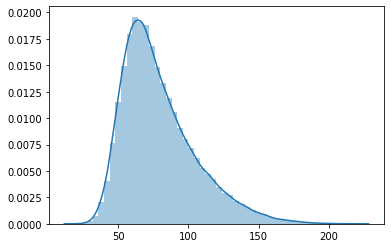

In [39]:
import seaborn as sns
sns.distplot(z,kde=True,hist=True)


In [40]:
#we see here the maximum words are between 80-100

In [41]:
pd.Series(z).describe()

count    69918.000000
mean        79.088446
std         26.123879
min         20.000000
25%         60.000000
50%         73.000000
75%         93.000000
max        220.000000
dtype: float64

In [556]:
import numpy as np
np.percentile(z,99.99)

210.01659999997355

In [557]:
len(tokenizer.word_index.items())+1

9759

In [42]:
max_length=210
pd_essy_train = pad_sequences(essy_train, maxlen=max_length)
pd_essy_cv=pad_sequences(essy_cv, maxlen=max_length)
pd_essy_test=pad_sequences(essy_test, maxlen=max_length)

In [43]:
vocab_size=len(tokenizer.word_index.items())+1
emb_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        emb_matrix[i] = embedding_vector


In [44]:
from keras.layers import LSTM
input_txt = Input(shape=(max_length,),name="essay_txt")
embd_layer=Embedding(vocab_size, 300, weights=[emb_matrix], input_length=max_length, trainable=False)(input_txt)
txt_LSTM=LSTM(100,return_sequences=True)(embd_layer)
txt_emb=Flatten()(txt_LSTM)


In [45]:
emb_matrix.shape

(9759, 300)

In [46]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
school_state_letrain=le1.fit_transform(X_train['school_state'])
#since it is label encoding the input dimension is 1 so we are using 1 as i/p dim
no_of_unique_cat1=len(le1.classes_)
size9 = min(no_of_unique_cat1//2,50)
input_schoolst = Input(shape=(1,),name="school_state")
embedschoolst= Embedding(input_dim=no_of_unique_cat1+1, output_dim=size9, input_length=1)(input_schoolst)
scstat_flatten = Flatten()(embedschoolst) 
school_state_lecv=le1.transform(X_cv['school_state'])
school_state_letest=le1.transform(X_test['school_state'])

#output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",na5me='emb_output')(embedding)#we are giving output of second layer
#flatten = tf.keras.layers.Flatten()
from sklearn import preprocessing
le3 = preprocessing.LabelEncoder()
project_grade_letrain=le3.fit_transform(X_train['project_grade_category'])
no_of_unique_cat2=len(le3.classes_)
size8 = min(no_of_unique_cat2//2,50)
input_grade_category = Input(shape=(1,),name="project_grade_category")
embedgrade_cat = Embedding(input_dim=no_of_unique_cat2+1, output_dim=size8, input_length=1)(input_grade_category)
projgrade_flatten = Flatten()(embedgrade_cat) 
project_grade_lecv=le3.transform(X_cv['project_grade_category'])
project_grade_letest=le3.transform(X_test['project_grade_category'])

from sklearn import preprocessing
le4 = preprocessing.LabelEncoder()
clean_categ_letrain=le4.fit_transform(X_train['clean_categories'])
no_of_unique_cat3=len(le4.classes_)
size6 = min(no_of_unique_cat3//2,50)
input_clean_categories = Input(shape=(1,),name="clean_categories")
clean_categembed = Embedding(input_dim=no_of_unique_cat3+1, output_dim=size6, input_length=1)(input_clean_categories)
clean_categ_flatten = Flatten()(clean_categembed) 

clean_categ_lecv=le4.transform(X_cv['clean_categories'])
clean_categ_letest=le4.transform(X_test['clean_categories'])


from sklearn import preprocessing
le5 = preprocessing.LabelEncoder()
clean_subcateg_letrain=le5.fit_transform(X_train['clean_subcategories'])
le5.classes_=np.append(le5.classes_,' ')
no_of_unique_cat4=len(le5.classes_)
size4 = min(no_of_unique_cat4//2,50)
input_clean_subcategories = Input(shape=(1,),name="clean_subcategories")
embesubcat = Embedding(input_dim=no_of_unique_cat4+1, output_dim=size4, input_length=1)(input_clean_subcategories)
clean_subcateg_flatten = Flatten()(embesubcat) 

X_cv['clean_subcategories']=X_cv['clean_subcategories'].map(lambda s: ' ' if s not in le5.classes_ else s)
X_test['clean_subcategories']=X_test['clean_subcategories'].map(lambda s: ' ' if s not in le5.classes_ else s)
#clean_subcateg_letrain=le5.fit_transform(X_train['clean_subcategories'])
clean_subcateg_lecv=le5.transform(X_cv['clean_subcategories'])
clean_subcateg_letest=le5.transform(X_test['clean_subcategories'])

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
teacher_prefix_letrain=le.fit_transform(X_train['teacher_prefix'])
no_of_unique_cat6=len(le.classes_)
size5 = min(no_of_unique_cat6//2,50)
input_teprefix = Input(shape=(1,),name="teacher_prefix")
prefixembed = Embedding(input_dim=no_of_unique_cat6+1, output_dim=size5, input_length=1)(input_teprefix)
teacher_prefix_flatten = Flatten()(prefixembed) 
teacher_prefix_lecv=le.transform(X_cv['teacher_prefix'])
teacher_prefix_letest=le.transform(X_test['teacher_prefix'])

In [48]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
trainprev_posted_proj = scale.fit_transform(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1,1))
cvprev_posted_proj = scale.transform(np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1,1))
testprev_posted_proj = scale.transform(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1,1))
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
train_price = scale.fit_transform(np.array(X_train['price']).reshape(-1,1))
cv_price = scale.transform(np.array(X_cv['price']).reshape(-1,1))
test_price = scale.transform(np.array(X_test['price']).reshape(-1,1))


In [49]:
input_numerical_features = Input(shape=(2,),name="numerical_features")
numerical_dense = Dense(5,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.01),name="numerical")(input_numerical_features)


In [50]:
trnumerical_features=np.hstack((trainprev_posted_proj,train_price))
cvnumerical_features=np.hstack((cvprev_posted_proj,cv_price))
testnumerical_features=np.hstack((testprev_posted_proj,test_price))

In [51]:
concat_layer = concatenate(inputs=[txt_emb,scstat_flatten,projgrade_flatten,clean_categ_flatten,clean_subcateg_flatten,teacher_prefix_flatten,numerical_dense],name="concat")
layer1 = Dense(units=256,activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01),name="layer1")(concat_layer)
d1=Dropout(0.3)(layer1)
layer4 = Dense(units=122,activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01),name="layer4")(d1)
d2=Dropout(0.2)(layer4)
layer6 = Dense(units=62,activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01),name="layer6")(d2)
output = Dense(2, activation='softmax', name='output')(layer6)
model2=Model(inputs=[input_txt,input_schoolst,input_grade_category,input_clean_categories,input_clean_subcategories,input_teprefix,input_numerical_features],outputs=[output])

In [52]:
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy', auroc])

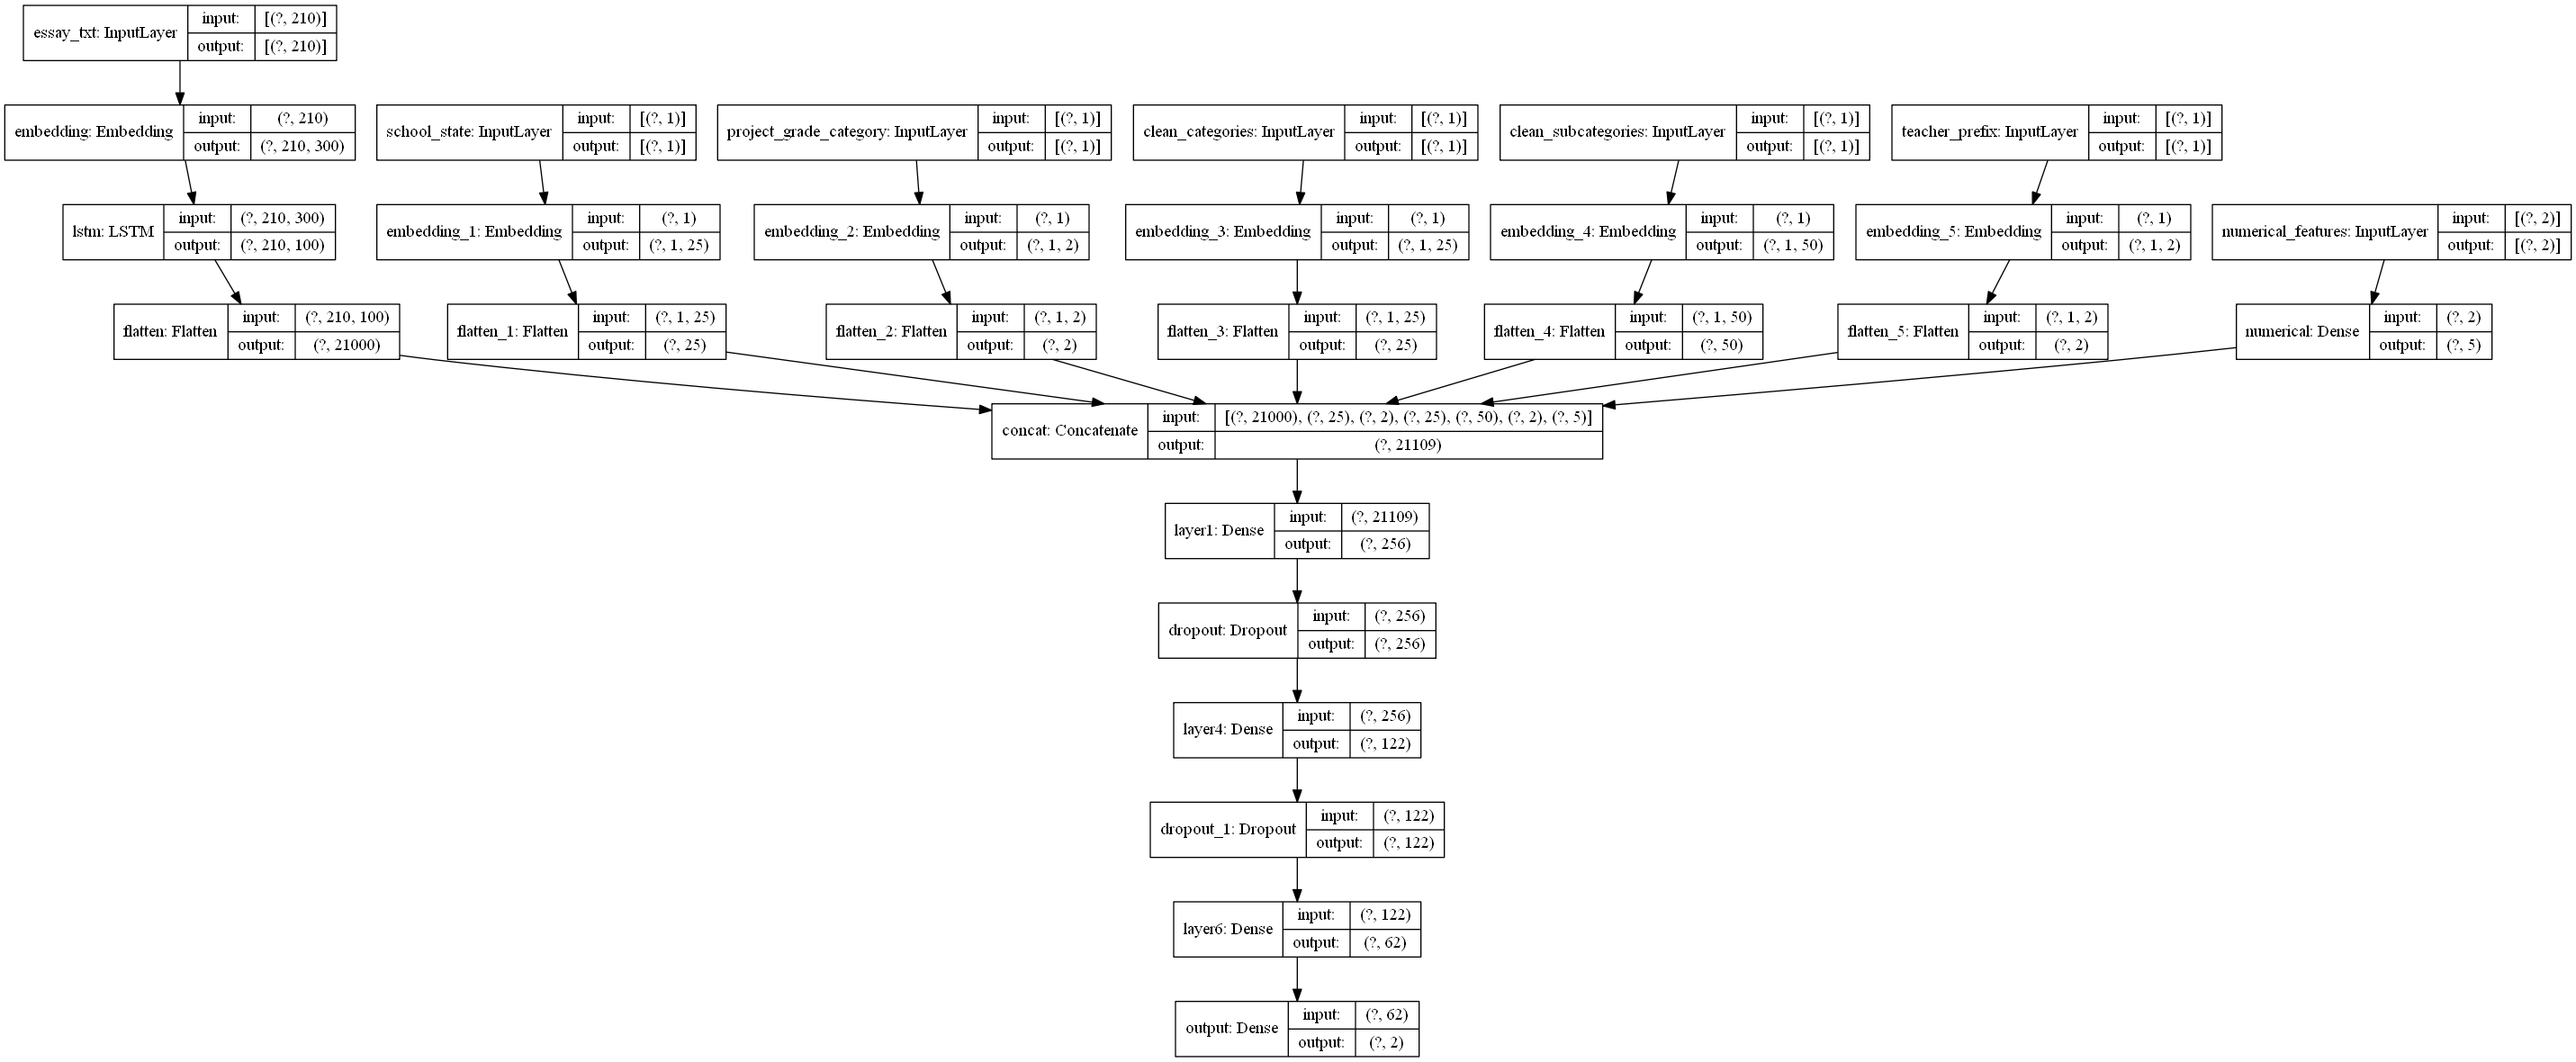

In [53]:
tf.keras.utils.plot_model(
    model2,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [54]:
trainable_x=[pd_essy_train,school_state_letrain,project_grade_letrain,clean_categ_letrain,clean_subcateg_letrain,teacher_prefix_letrain,trnumerical_features]

cv_x=[pd_essy_cv,school_state_lecv,project_grade_lecv,clean_categ_lecv,clean_subcateg_lecv,teacher_prefix_lecv,cvnumerical_features]

test_x=[pd_essy_test,school_state_letest,project_grade_letest,clean_categ_letest,clean_subcateg_letest,teacher_prefix_letest,testnumerical_features]

In [89]:
import os
checkpoint_path = "training_model2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,save_weights_only=True,verbose=1)


import tensorflow as tf
import datetime, os
logs_base_dir = "./logs1"
os.makedirs(logs_base_dir, exist_ok=True)




logdir = os.path.join("logs1", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

%tensorboard --logdir {logs_base_dir}

In [90]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [91]:
%tensorboard --logdir {logs_base_dir}

Reusing TensorBoard on port 6006 (pid 6604), started 0:02:39 ago. (Use '!kill 6604' to kill it.)

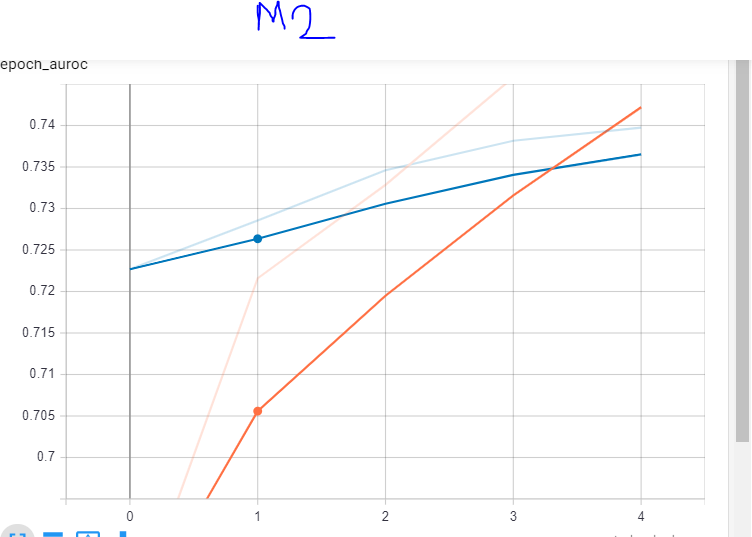

In [203]:
from IPython.display import Image
Image("C:/Users/thrib/Pictures/Camera Roll/M2_auc.PNG")


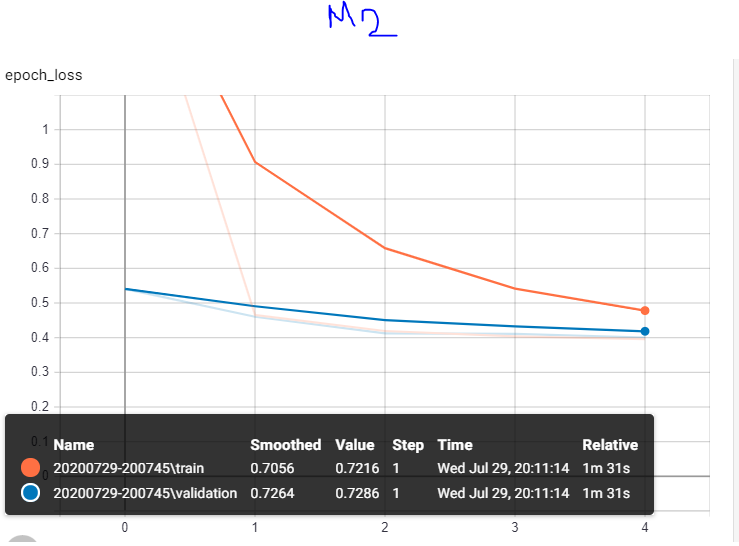

In [204]:
from IPython.display import Image
Image("C:/Users/thrib/Pictures/Camera Roll/m2_loss.PNG")


In [92]:
history2 = model2.fit(trainable_x,y_train_ohe,batch_size=256,epochs=5,validation_data=(cv_x,y_cv_ohe),verbose=1,callbacks=[cp_callback,tensorboard_callback])




Epoch 1/5
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
274/274 [==============================] - ETA: 0s - loss: 1.6431 - accuracy: 0.8470 - auroc: 0.6789
Epoch 00001: val_loss improved from inf to 0.54092, saving model to training_model2/cp.ckpt
274/274 [==============================] - 92s 337ms/step - loss: 1.6431 - accuracy: 0.8470 - auroc: 0.6789 - val_loss: 0.54

# when I tried for another 2 epochs it is decreasing

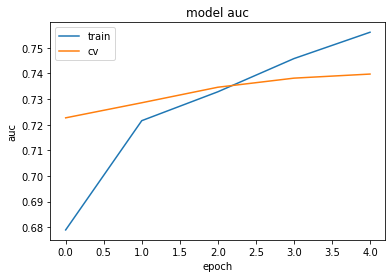

In [93]:
import matplotlib.pyplot as plt
plt.plot(history2.history['auroc'])
plt.plot(history2.history['val_auroc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'cv'])
plt.show()

In [164]:
li

In [94]:
import os
checkpoint_path = "training_model2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,save_weights_only=True,verbose=1)

checkpoint_path = "training_model2/cp.ckpt"
model_ckpt2 = model2
model_ckpt2.load_weights(checkpoint_path)

In [95]:
checkpoint_path = "training_model2/cp.ckpt"
model_ckpt2 = model2
model_ckpt2.load_weights(checkpoint_path)

In [96]:
model2.evaluate(test_x,y_test_ohe,batch_size=100)

219/219 [==============================] - 14s 65ms/step - loss: 0.3990 - accuracy: 0.8486 - auroc: 0.7414


[0.3990419805049896, 0.848604142665863, 0.7414166927337646]

# using model callback trained with the best weight and and got an AUC of 0.7414

# MODEL-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [165]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
trainprev_posted_proj = scale.fit_transform(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1,1))
cvprev_posted_proj = scale.transform(np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1,1))
testprev_posted_proj = scale.transform(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1,1))
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
train_price = scale.fit_transform(np.array(X_train['price']).reshape(-1,1))
cv_price = scale.transform(np.array(X_cv['price']).reshape(-1,1))
test_price = scale.transform(np.array(X_test['price']).reshape(-1,1))


In [166]:
from sklearn.preprocessing import OneHotEncoder
ohe1 = preprocessing.OneHotEncoder()
ohe1.fit(np.array(X_train['school_state']).reshape(-1,1))
#ohe3.fit(np.array(X_train['project_grade_category']).reshape(-1,1))
no_of_unique_cat=len(ohe1.categories_)
size9 = min(no_of_unique_cat//2,50)
input_schoolst = Input(shape=(1,),name="school_state")
embedschoolst= Embedding(input_dim=no_of_unique_cat+1, output_dim=size9, input_length=1)(input_schoolst)
scstat_flatten = Flatten()(embedschoolst) 
school_state_letrain=ohe1.transform(np.array(X_train['school_state']).reshape(-1,1))
school_state_lecv=ohe1.transform(np.array(X_cv['school_state']).reshape(-1,1))
school_state_letest=ohe1.transform(np.array(X_test['school_state']).reshape(-1,1))


In [167]:



#output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",na5me='emb_output')(embedding)#we are giving output of second layer
#flatten = tf.keras.layers.Flatten()
from sklearn.preprocessing import OneHotEncoder
ohe3 = preprocessing.OneHotEncoder()
ohe3.fit(np.array(X_train['project_grade_category']).reshape(-1,1))
no_of_unique_cat=len(ohe3.categories_)
size8 = min(no_of_unique_cat//2,50)
input_grade_category = Input(shape=(1,),name="project_grade_category")
embedgrade_cat = Embedding(input_dim=no_of_unique_cat+1, output_dim=size8, input_length=1)(input_grade_category)
projgrade_flatten = Flatten()(embedgrade_cat) 
project_grade_ohetrain=ohe3.fit_transform(np.array(X_train['project_grade_category']).reshape(-1,1))
project_grade_ohecv=ohe3.transform(np.array(X_cv['project_grade_category']).reshape(-1,1))
project_grade_ohetest=ohe3.transform(np.array(X_test['project_grade_category']).reshape(-1,1))



from sklearn import preprocessing
ohe4 = preprocessing.OneHotEncoder()
ohe4.fit_transform(np.array(X_train['clean_categories']).reshape(-1,1))
no_of_unique_subcat=len(ohe4.categories_)
size6 = min(no_of_unique_cat//2,50)
input_clean_categories = Input(shape=(1,),name="clean_categories")
clean_categembed = Embedding(input_dim=no_of_unique_subcat+1, output_dim=size6, input_length=1)(input_clean_categories)
clean_categ_flatten = Flatten()(clean_categembed) 
clean_categ_ohetrain=ohe4.fit_transform(np.array(X_train['clean_categories']).reshape(-1,1))
clean_categ_ohecv=ohe4.transform(np.array(X_cv['clean_categories']).reshape(-1,1))
clean_categ_ohetest=ohe4.transform(np.array(X_test['clean_categories']).reshape(-1,1))




from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
ohe.fit_transform(np.array(X_train['teacher_prefix']).reshape(-1,1))
no_of_unique_cat=len(ohe.categories_)
size5 = min(no_of_unique_cat//2,50)
input_teprefix = Input(shape=(1,),name="teacher_prefix")
prefixembed = Embedding(input_dim=no_of_unique_cat, output_dim=size5, input_length=1)(input_teprefix)
teacher_prefix_flatten = Flatten()(prefixembed) 
teacher_prefix_ohetrain=ohe.fit_transform(np.array(X_train['teacher_prefix']).reshape(-1,1))
teacher_prefix_ohecv=ohe.transform(np.array(X_cv['teacher_prefix']).reshape(-1,1))
teacher_prefix_ohetest=ohe.transform(np.array(X_test['teacher_prefix']).reshape(-1,1))

In [168]:

from sklearn import preprocessing
ohe5 = preprocessing.OneHotEncoder(handle_unknown='ignore')
clean_subcateg_ohetrain=ohe5.fit_transform(np.array(X_train['clean_subcategories']).reshape(-1,1))
no_of_unique_cat=len(ohe5.categories_)
size4 = min(no_of_unique_cat//2,50)
input_clean_subcategories = Input(shape=(1,),name="clean_subcategories")
embesubcat = Embedding(input_dim=no_of_unique_cat+1, output_dim=size4, input_length=1)(input_clean_subcategories)
clean_subcateg_flatten = Flatten()(embesubcat)

clean_subcateg_ohecv=ohe5.transform(np.array(X_cv['clean_subcategories']).reshape(-1,1))
clean_subcateg_ohetest=ohe5.transform(np.array(X_test['clean_subcategories']).reshape(-1,1))


In [169]:
project_grade_ohetrain.shape

(69918, 4)

In [170]:
school_state_letrain.shape

(69918, 51)

In [171]:
clean_categ_ohetrain.shape

(69918, 51)

In [172]:
clean_subcateg_ohetrain.shape

(69918, 392)

In [173]:
teacher_prefix_ohetrain.shape

(69918, 5)

In [174]:
train_price.shape

(69918, 1)

In [175]:
trainprev_posted_proj.shape

(69918, 1)

In [176]:

from scipy.sparse import hstack
trainotherthntext_features=hstack([school_state_letrain,teacher_prefix_ohetrain,project_grade_ohetrain,trainprev_posted_proj,clean_categ_ohetrain,clean_subcateg_ohetrain,train_price]).todense()
cvotherthntext_features=hstack([school_state_lecv,teacher_prefix_ohecv,project_grade_ohecv,cvprev_posted_proj,clean_categ_ohecv,clean_subcateg_ohecv,cv_price]).todense()
testotherthntext_features=hstack([school_state_letest,teacher_prefix_ohetest,project_grade_ohetest,testprev_posted_proj,clean_categ_ohetest,clean_subcateg_ohetest,test_price]).todense()



In [177]:
trainotherthntext_features.shape

(69918, 505)

In [178]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['essay'])
essy_train=tokenizer.texts_to_sequences(X_train['essay'])
essy_cv=tokenizer.texts_to_sequences(X_cv['essay'])
essy_test=tokenizer.texts_to_sequences(X_test['essay'])
vocab_size=len(tokenizer.word_index.items())+1

In [179]:
z=[]
for i in essy_train:
    z.append(len(i))

118


151.25458394118826

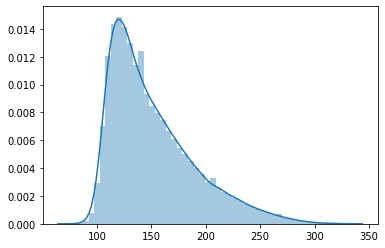

In [180]:
import seaborn as sns
sns.distplot(z,kde=True,hist=True)
import statistics 
print(statistics.mode(z))
np.mean(np.array(z))

In [181]:
np.percentile(z,99.99)

323.0082999999868

In [182]:
max_length=310
pd_essy_train = pad_sequences(essy_train, maxlen=max_length)
pd_essy_cv=pad_sequences(essy_cv, maxlen=max_length)
pd_essy_test=pad_sequences(essy_test, maxlen=max_length)

In [183]:
vocab_size=len(tokenizer.word_index.items())+1

In [184]:
vocab_size

47380

In [185]:

emb_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        emb_matrix[i] = embedding_vector

In [186]:
from keras.layers import LSTM
input_txt = Input(shape=(max_length,),name="essay_txt")
embd_layer=Embedding(vocab_size, 300, weights=[emb_matrix], input_length=max_length, trainable=False)(input_txt)
txt_LSTM=LSTM(100,return_sequences=True)(embd_layer)
txt_emb=Flatten()(txt_LSTM)

In [187]:
trainable_x=[pd_essy_train ,trainotherthntext_features]
cv_x=[pd_essy_cv,cvotherthntext_features]
test_x=[pd_essy_test,testotherthntext_features]

In [ ]:
#https://stackoverflow.com/questions/51344610/how-to-setup-1d-convolution-and-lstm-in-keras
inp_conv=Input(shape=(505,1))
x1 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_initializer="he_normal")(inp_conv)
x2 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_initializer="he_normal")(x1)
F1 = Flatten()(x2)

In [189]:
concatenatex= concatenate([txt_emb,F1])
L1 = Dense(128,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(concatenatex)
d1=Dropout(0.3)(L1)
L3 = Dense(64,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(d1)
d2=Dropout(0.2)(L3)
L3 = Dense(32,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(d2)
output = Dense(2, activation='softmax', name='output')(L3)
model3 = Model(inputs=[input_txt,inp_conv],outputs=[output])

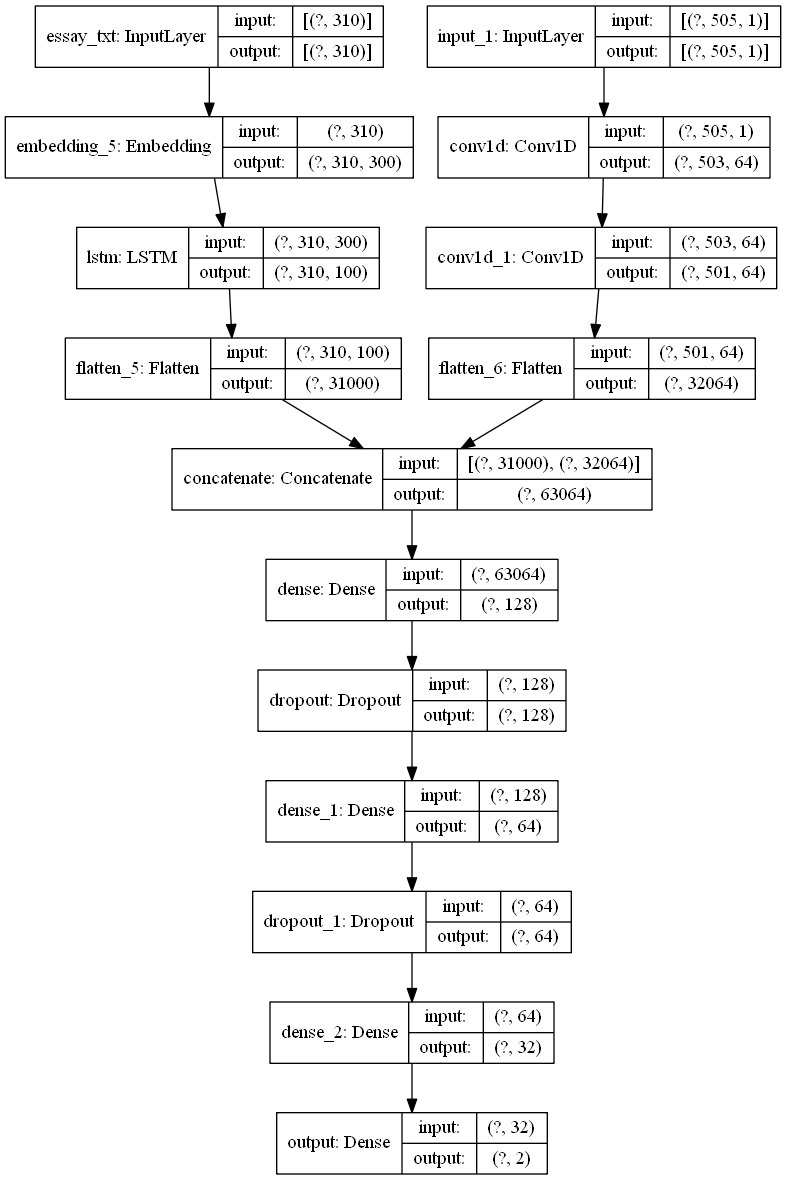

In [190]:
tf.keras.utils.plot_model(
    model3,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [191]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_txt (InputLayer)          [(None, 310)]        0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 505, 1)]     0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 310, 300)     14214000    essay_txt[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 503, 64)      256         input_1[0][0]                    
______________________________________________________________________________________________

In [192]:
trainable_x=[pd_essy_train ,trainotherthntext_features]
cv_x=[pd_essy_cv,cvotherthntext_features]
test_x=[pd_essy_test,testotherthntext_features]

In [193]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = OneHotEncoder()
y_train_ohe = encoder.fit_transform(np.array(y_train).reshape(-1,1))
y_test_ohe = encoder.transform(np.array(y_test).reshape(-1,1))
y_cv_ohe = encoder.transform(np.array(y_cv).reshape(-1,1))
y_train_ohe = y_train_ohe.toarray()
y_test_ohe = y_test_ohe.toarray()
y_cv_ohe=y_cv_ohe.toarray()

In [194]:

model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy', auroc])


In [195]:
import os
checkpoint_path = "training_model3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,save_weights_only=True,verbose=1)


import tensorflow as tf
import datetime, os
logs_base_dir = "./logs1"
os.makedirs(logs_base_dir, exist_ok=True)




logdir = os.path.join("logs1", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

%tensorboard --logdir {logs_base_dir}

Reusing TensorBoard on port 6006 (pid 6604), started 1:32:21 ago. (Use '!kill 6604' to kill it.)

In [196]:
history3 = model3.fit(trainable_x,y_train_ohe,batch_size=100,epochs=5,validation_data=(cv_x,y_cv_ohe),verbose=1,callbacks=[cp_callback,tensorboard_callback])


Epoch 1/5
700/700 [==============================] - ETA: 0s - loss: 0.5632 - accuracy: 0.8480 - auroc: 0.6966
Epoch 00001: val_loss improved from inf to 0.45809, saving model to training_model3/cp.ckpt
700/700 [==============================] - 373s 532ms/step - loss: 0.5632 - accuracy: 0.8480 - auroc: 0.6966 - val_loss: 0.4581 - val_accuracy: 0.8522 - val_auroc: 0.7482
Epoch 2/5
700/700 [==============================] - ETA: 0s - loss: 0.4382 - accuracy: 0.8525 - auroc: 0.7532
Epoch 00002: val_loss improved from 0.45809 to 0.42662, saving model to training_model3/cp.ckpt
700/700 [==============================] - 381s 544ms/step - loss: 0.4382 - accuracy: 0.8525 - auroc: 0.7532 - val_loss: 0.4266 - val_accuracy: 0.8549 - val_auroc: 0.7590
Epoch 3/5
700/700 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.8542 - auroc: 0.7697
Epoch 00003: val_loss improved from 0.42662 to 0.39957, saving model to training_model3/cp.ckpt
700/700 [==============================] 

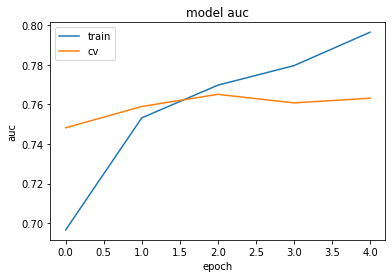

In [197]:
import matplotlib.pyplot as plt
plt.plot(history3.history['auroc'])
plt.plot(history3.history['val_auroc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'cv'])
plt.show()

In [198]:
model3.evaluate(test_x,y_test_ohe,batch_size=100)

219/219 [==============================] - 43s 194ms/step - loss: 0.4083 - accuracy: 0.8546 - auroc: 0.7670


[0.4083396792411804, 0.8545995354652405, 0.7669599652290344]

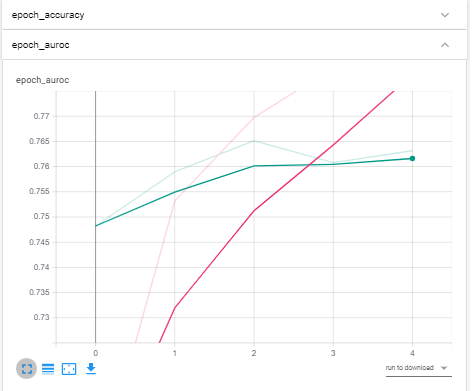

In [208]:
from IPython.display import Image
Image("C:/Users/thrib/Pictures/Camera Roll/m3_auroc.PNG")


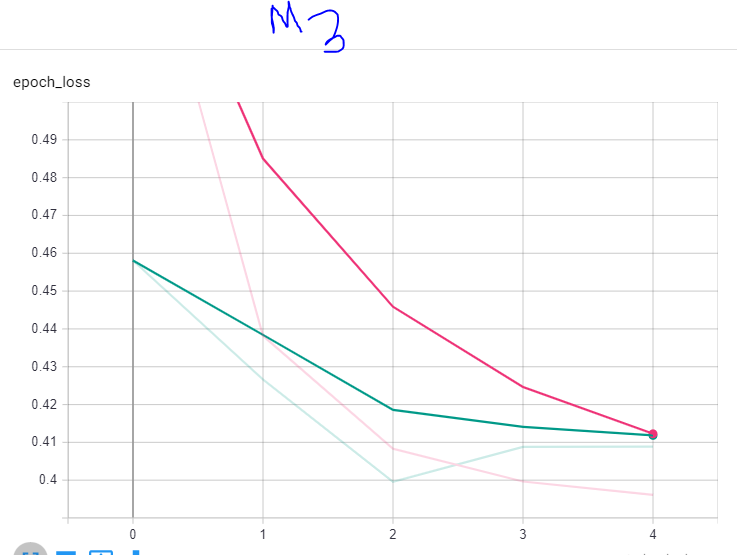

In [205]:
from IPython.display import Image
Image("C:/Users/thrib/Pictures/Camera Roll/M3.PNG")


In [210]:
from prettytable import PrettyTable
x = PrettyTable()

In [211]:
x.field_names = ["models", "train_auc", "Test_auc"]
x.add_row(["model1",0.7893, 0.7639])
x.add_row(["model2",0.7567, 0.7414])
x.add_row(["model3", 0.7965, 0.7669])
print(x)

+--------+-----------+----------+
| models | train_auc | Test_auc |
+--------+-----------+----------+
| model1 |   0.7893  |  0.7639  |
| model2 |   0.7567  |  0.7414  |
| model3 |   0.7965  |  0.7669  |
+--------+-----------+----------+
